<a href="https://colab.research.google.com/github/jesvin1/Basics/blob/master/TimeSeries_Finance_Udemy_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive Power Score
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [1]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=425daa2d99d0ffe742c68838e4697ded7efe0439f5ad84107482f1204e73dd3c
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [20]:
import fix_yahoo_finance as yf
import datetime as datetime
import ppscore as pps
stocks = ['^GSPC','^GDAXI','^FTSE','^N225','^NSEI','^BSESN']
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2020,5,1)
data = yf.download(stocks, start=start, end=end)

[*********************100%***********************]  6 of 6 downloaded


In [21]:
df = data.copy()
df.tail()

Open               ...    Volume          
                  ^BSESN        ^FTSE  ...     ^N225     ^NSEI
Date                                   ...                    
2020-04-27  31659.039063  5752.200195  ...   77600.0  512800.0
2020-04-28  32101.910156  5846.799805  ...   68600.0  614500.0
2020-04-29  32311.039063  5958.500000  ...       NaN  653000.0
2020-04-30  33381.191406  6115.299805  ...  103400.0  931200.0
2020-05-01           NaN          NaN  ...   86600.0       NaN

[5 rows x 36 columns]

In [22]:
df = df.drop(['Low','Open','High','Close'],axis =1)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [23]:
df.tail()

Adj Close               ...    Volume          
                  ^BSESN        ^FTSE  ...     ^N225     ^NSEI
Date                                   ...                    
2020-04-27  31743.080078  5846.799805  ...   77600.0  512800.0
2020-04-28  32114.519531  5958.500000  ...   68600.0  614500.0
2020-04-29  32720.160156  6115.299805  ...       NaN  653000.0
2020-04-30  33717.621094  5901.200195  ...  103400.0  931200.0
2020-05-01           NaN          NaN  ...   86600.0       NaN

[5 rows x 12 columns]

In [24]:
df.describe()

Adj Close               ...         Volume              
             ^BSESN        ^FTSE  ...          ^N225         ^NSEI
count   5004.000000  5123.000000  ...    4982.000000  3.079000e+03
mean   17222.456416  5892.922778  ...  106939.181052  1.336602e+05
std    10881.062282  1018.947011  ...   63240.153122  1.698484e+05
min     2600.120117  3287.000000  ...       0.000000  0.000000e+00
25%     6303.002564  5209.100098  ...   67900.000000  0.000000e+00
50%    16949.485351  5954.299805  ...  110350.000000  1.273000e+05
75%    26001.330078  6653.400147  ...  143500.000000  1.967000e+05
max    41952.628906  7877.500000  ...  595200.000000  1.811000e+06

[8 rows x 12 columns]

In [7]:
df.isna().sum()

Adj Close  ^FTSE      169
           ^GDAXI     135
           ^GSPC      178
           ^N225      310
           ^NSEI     2213
Volume     ^FTSE      169
           ^GDAXI     135
           ^GSPC      178
           ^N225      310
           ^NSEI     2213
dtype: int64

#Plotting Data

In [0]:
import matplotlib.pyplot as plt

In [25]:
df.columns

MultiIndex([('Adj Close', '^BSESN'),
            ('Adj Close',  '^FTSE'),
            ('Adj Close', '^GDAXI'),
            ('Adj Close',  '^GSPC'),
            ('Adj Close',  '^N225'),
            ('Adj Close',  '^NSEI'),
            (   'Volume', '^BSESN'),
            (   'Volume',  '^FTSE'),
            (   'Volume', '^GDAXI'),
            (   'Volume',  '^GSPC'),
            (   'Volume',  '^N225'),
            (   'Volume',  '^NSEI')],
           )

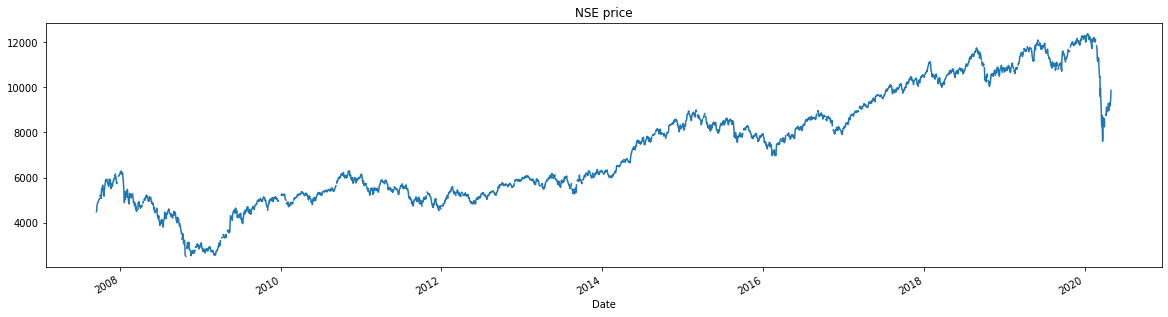

In [13]:
df[('Adj Close', '^NSEI')].plot(figsize=(20,5), title = 'NSE price')

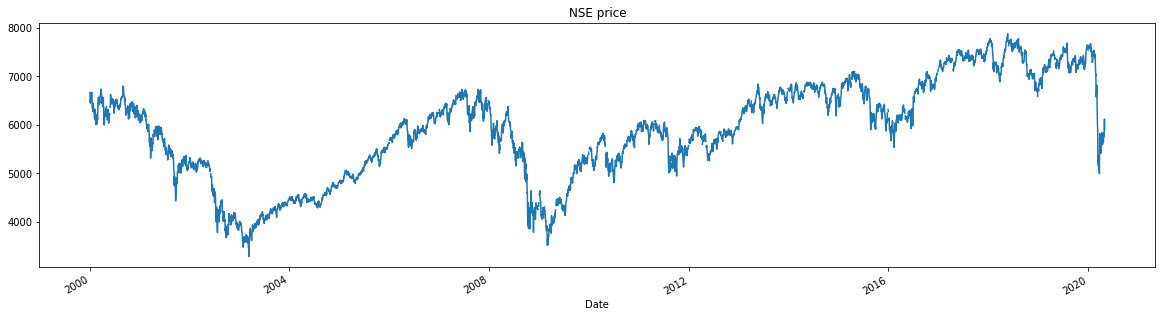

In [14]:
df[('Adj Close', '^FTSE')].plot(figsize=(20,5), title = 'FTSE price')

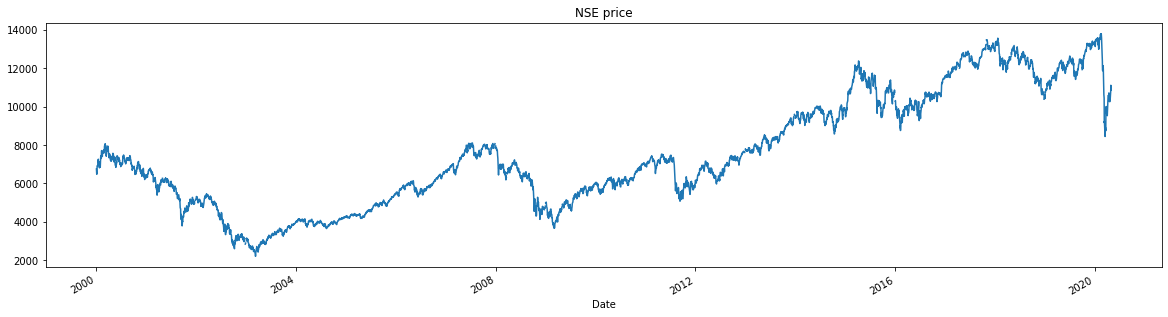

In [15]:
df[('Adj Close', '^GDAXI')].plot(figsize=(20,5), title = 'GDAXI price')

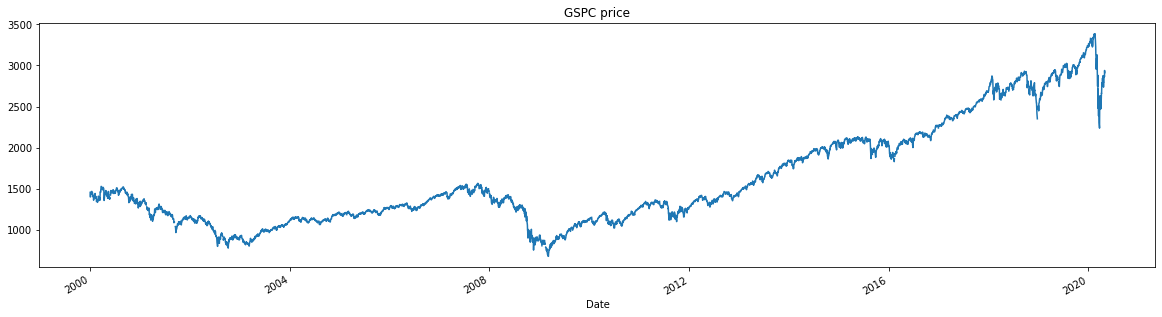

In [16]:
df[('Adj Close', '^GSPC')].plot(figsize=(20,5), title = 'GSPC price')

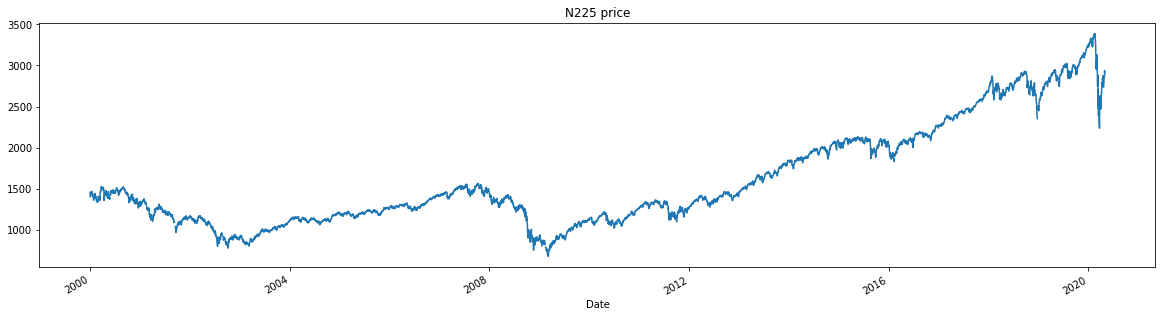

In [17]:
df[('Adj Close', '^GSPC')].plot(figsize=(20,5), title = 'N225 price')

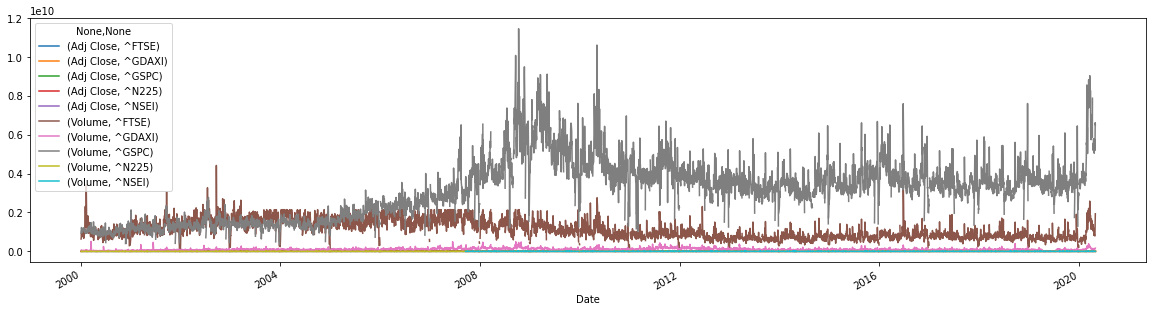

In [18]:
df.plot(figsize=(20,5))

Text(0.5, 1.0, 'FTSE Vs NSE')

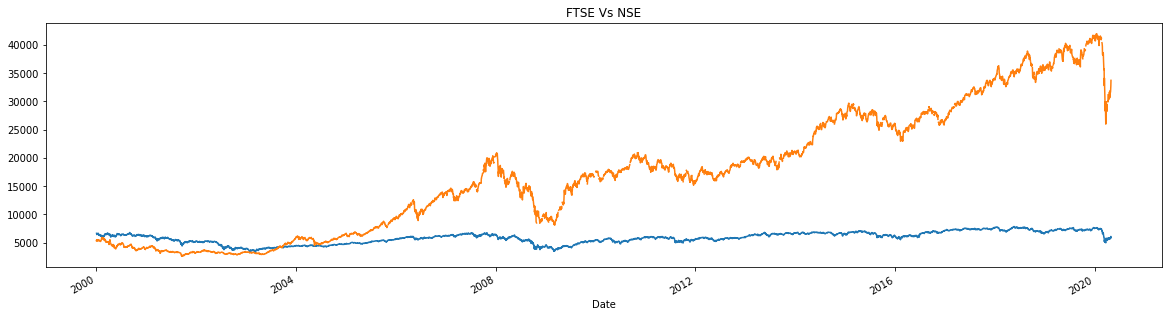

In [26]:
df[('Adj Close', '^FTSE')].plot(figsize=(20,5))
df[('Adj Close', '^BSESN')].plot(figsize=(20,5))
plt.title('FTSE Vs NSE')

#QQ Plot

In [0]:
import scipy.stats
import pylab

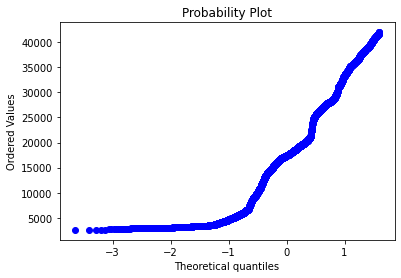

In [30]:
scipy.stats.probplot(df[('Adj Close', '^BSESN')],plot=pylab)
pylab.show()